<center>
    <img src="drummerBoy.png" width="120" alt="cognitiveclass.ai logo"  />
</center>
<center>
    Windmill Algo
</center>


# World Happiness 

## Overview

Each year, there seems to be new worthwhile charities doing some amazing work at ground zero. There are new initiatives being set up all the time, one I'm personally a fan of is the CEA (Centre for Effective Altruism) where people can donate 10% of their income to the most effective charities. There are some amazing companies that do the leg work, looking into the effectiveness of charities and letting us know which ones we can donate to that give us the greatest rewards - or at least the most impact to the most in need people.

What I would like to look at in this post, is which countries in the world are most like other countries. We are aware of problems that exist in the world but most of our knowledge on this subject matter is from the media - either mainstream or social. What I would like to do here is get some real-world data (or as close to real world as possible) and categorise Countries to show you which countries are like other countries. Are England and America similar? Or is America more like Mexico that it might think? Which Asian Countries are like other Asian countries? Where do Australia and New Zealand sit in all of this? Are they more like Europe than other neighbouring countries?
I will be using data obtained for the World Happiness report to run unsupervised machine learning to categorise the countries so we may get a basic yet fairly accurate view of country relationships around the world based on the people.


Every year, a World Happiness Report is published by the Sustainable Development Solutions Network, powered by data from the Gallup World Poll and Lloyd's Register Foundation, who provide access to the World Risk Poll. With that in mind, it's important to note that the World Happiness Report is written by a group of independent experts acting in their personal capacities. Any views expressed in the reports do not necessarily reflect the views of any organization, agency, or program of the United Nations.

I will not be quoting from the report, solely using the data collected in order to take the report into a different direction. Before we dive in, it is prudent to explain what criteria is used in the report and how the data is collected.

## Data

**Log GDP per capita:** The statistics of GDP per capita (variable name GDP) in purchasing power parity(PPP) at constant 2017 international dollar prices are from the October 14,2020 update of the World Development Indicators<br>
**Social support:** Social support (or having someone to count on in times of trouble) is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”<br>
**Healthy life expectancy at birth:** Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) GlobalHealth Observatory data repository (Last updated: 2020-09-28). The data at the source are available for the years 2000, 2005, 2010, 2015 and 2016. To match this report’s sample period (2005-2020), interpolation and extrapolation are used.<br>
**Freedom to make life choices:** Freedom to make life choices is the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”<br>
Generosity: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.<br>
**Perceptions of corruption:** Corruption Perception: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses. In case the perception of government corruption is missing, we use the perception of business corruption as the overall perception. The corruption perception at the national level is just the average response of the overall perception at the individual level.<br>
**Positive affect:** Positive affect is defined as the average of three positive affect measures in GWP: happiness, laugh and enjoyment in the Gallup World Poll waves 3-7.These measures are the responses to the following three questions, respectively: “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Happiness?”, “Did you smile or laugh a lot yesterday?”, and “Did you experience the following feelings during A LOT OF THE Day yesterday? How about Enjoyment?” Waves 3-7 cover years 2008 to 2012 and a small number of countries in 2013. For waves 1-2 and those from wave 8 on, positive affect is defined as the average of laugh and enjoyment only, due to the limited availability of happiness.<br>
**Negative affect:** Negative affect is defined as the average of three negative affect measures in GWP. They are worry, sadness and anger, respectively the responses to “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?”, “Did you experience the following feelings during A LOTOF THE DAY yesterday? How about Sadness?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?”




<h1>STEP 1: Preliminary Data Analysis

Let's import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import matplotlib as mpl

from sklearn.cluster import KMeans

import folium 

print('Libraries imported')

Libraries imported


**Firstly we will need to download, extract and format the data in which to work with.**

In [2]:
# Set the URLs of the data required
url_historical = 'https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls'
url_2020 = 'https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls'

df_historical = pd.read_excel (url_historical)
df_2020 = pd.read_excel(url_2020)

In [3]:
df_historical.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [4]:
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


**We will initially do some exploratory analysis with the World Happiness Report historical data**

In [5]:
df_historical.shape

(1949, 11)

In [6]:
# Let's see the columns
df_historical.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
# Let's create a columns name list to clean up the dataframe
column_names = ['country', 'year', 'LifeLadder', 'LogGDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancyAtBirth',
       'FreedomToMakeLifeChoices', 'Generosity',
       'PerceptionsOfCorruption', 'PositiveAffect', 'NegativeAffect']

# now we will assign the columns to the dataframe
df_historical.columns = column_names

df_historical.head()

,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


**Let us explore historical data from the UK to see if there are any trends**

In [8]:
# Create a dataframe for the UK historical data only
uk = df_historical[df_historical.country == 'United Kingdom']

In [9]:
uk.shape

(15, 11)

In [10]:
uk.head()

,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
1821,United Kingdom,2005,6.983557,10.662885,0.978840,69.900002,0.922355,NaN,0.398457,0.864076,0.261732
1822,United Kingdom,2007,6.801931,10.699264,0.969870,70.459999,0.838332,0.336252,0.498093,0.782353,0.241052
1823,United Kingdom,2008,6.986464,10.688578,0.953839,70.739998,0.759144,0.331124,0.547769,0.818951,0.218297
1824,United Kingdom,2009,6.906547,10.637608,0.964429,71.019997,0.816229,0.341457,0.558927,0.846380,0.231029
1825,United Kingdom,2010,7.029364,10.649076,0.955068,71.300003,0.841307,0.403173,0.586813,0.862621,0.176343


In [11]:
# Let's reset the index
uk = uk.reset_index(drop=True)
uk.head(2)

,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,United Kingdom,2005,6.983557,10.662885,0.97884,69.900002,0.922355,NaN,0.398457,0.864076,0.261732
1,United Kingdom,2007,6.801931,10.699264,0.96987,70.459999,0.838332,0.336252,0.498093,0.782353,0.241052


**UK Log GDP Per Capita Trend**

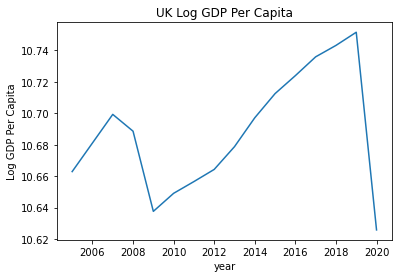

In [12]:
plt.plot(uk.year, uk.LogGDPperCapita)
plt.title('UK Log GDP Per Capita')
plt.xlabel('year')
plt.ylabel('Log GDP Per Capita')
plt.show()

So, from the above, we can see 2 major events - or what would be perceived as major impacts on GDP per Capita. We can see a big sharp down move in 2008 which coincides with the 2008 financial crises and then a massive spike down after a gradual re-building post financial 2008 crisis. The 2019-2020 downturn will almost certainly be attributed to Covid.
With those 2 x years in mind, let us look a bit into other metrics to see if any are correlated.

**Perceived Levels of Corruption in the UK Government and Business**

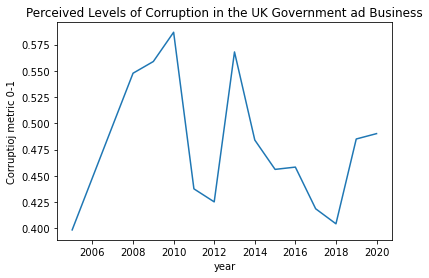

In [13]:
plt.plot(uk.year, uk.PerceptionsOfCorruption)
plt.title('Perceived Levels of Corruption in the UK Government ad Business')
plt.xlabel('year')
plt.ylabel('Corruptioj metric 0-1')
plt.show()

These levels do not appear to correlate against the Log GDP per Capita ranges. There is an uptick of corruption sentiment in 2008 but that is off the back of an already large increase in the preceding years. With the government in the constant spotlight and ongoing MP scandals, especially in the ongoing news, I expect perceived levels of Corruption in the UK to rise in 2021.

**Perceived Social Support in the UK**

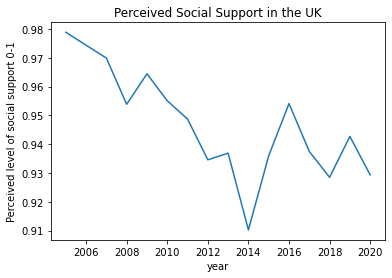

In [14]:
plt.plot(uk.year, uk.SocialSupport)
plt.title('Perceived Social Support in the UK')
plt.xlabel('year')
plt.ylabel('Perceived level of social support 0-1')
plt.show()

Here we see a consistent down trend in the Social support side of the UK. This echoes many articles I have read and podcasts I've listened with regards to society as a whole. Any conclusions on Social life in the UK at this stage would be speculation but I suspect the trend of turning to social media/technology for satisfaction and the decrease in outdoor pursuits may be contributing to this. Just ask yourself how many Facebook friends do you have vs how many friends you speak to on a weekly basis. What type of interactions are you having with your friends on social media? All of these factors need to be taken into consideration. I fear one of the last places many people find human interaction and friendship is in the workplace and even that now seems to be trending towards home office working environments.

**Healthy life expectancy at birth**

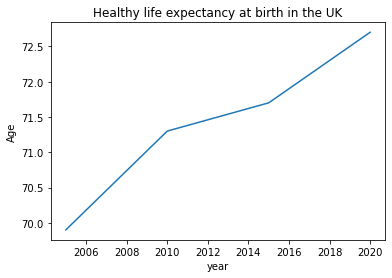

In [15]:
plt.plot(uk.year, uk.HealthyLifeExpectancyAtBirth)
plt.title('Healthy life expectancy at birth in the UK')
plt.xlabel('year')
plt.ylabel('Age')
plt.show()

So here we see a nice upward trend of Healthy life expectancy from birth. I suspect the larger this figure grows, the slower the rate of growth will become and a comparison against other 3rd world nations truly puts that into perspective. For now, it is a nice trend to see.

**Positive Affect', 'Negative Affect**

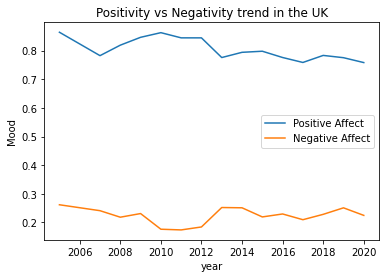

In [16]:
plt.plot(uk.year, uk.PositiveAffect)
plt.plot(uk.year, uk.NegativeAffect)
plt.legend(['Positive Affect', 'Negative Affect'])
plt.title('Positivity vs Negativity trend in the UK')
plt.xlabel('year')
plt.ylabel('Mood')
plt.show()

Here we can see a slight down trend in positivity with an up and down in a .1 range in negativity. 2021 results will tell the Covid story I'm sure.

**Let's run some comparisons against a few other nations**

In [17]:
italy = df_historical[df_historical.country == 'Italy']
china = df_historical[df_historical.country == 'China']
australia = df_historical[df_historical.country == 'Australia']
usa = df_historical[df_historical.country == 'United States']
singapore = df_historical[df_historical.country == 'Singapore']

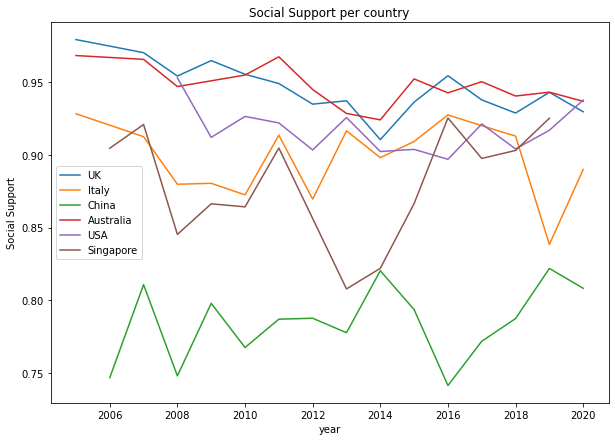

In [18]:
fig = plt.figure(figsize=(10, 7))
plt.plot(uk.year, uk.SocialSupport)
plt.plot(italy.year, italy.SocialSupport)
plt.plot(china.year, china.SocialSupport)
plt.plot(australia.year, australia.SocialSupport)
plt.plot(usa.year, usa.SocialSupport)
plt.plot(singapore.year, singapore.SocialSupport)
plt.legend(['UK', 'Italy', 'China', 'Australia', 'USA', 'Singapore'])
plt.title('Social Support per country')
plt.xlabel('year')
plt.ylabel('Social Support')
plt.show()

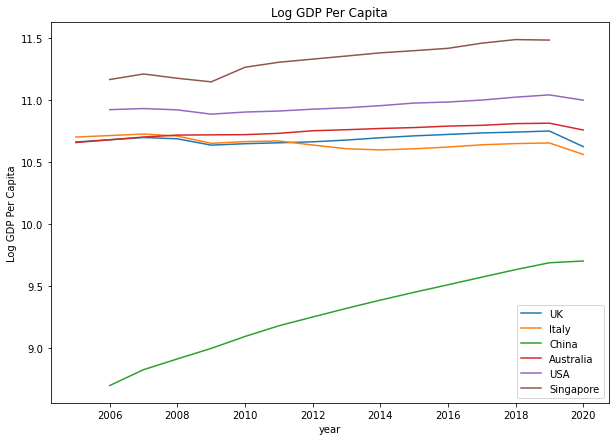

In [19]:
fig = plt.figure(figsize=(10, 7))
plt.plot(uk.year, uk.LogGDPperCapita)
plt.plot(italy.year, italy.LogGDPperCapita)
plt.plot(china.year, china.LogGDPperCapita)
plt.plot(australia.year, australia.LogGDPperCapita)
plt.plot(usa.year, usa.LogGDPperCapita)
plt.plot(singapore.year, singapore.LogGDPperCapita)
plt.legend(['UK', 'Italy', 'China', 'Australia', 'USA', 'Singapore'])
plt.title('Log GDP Per Capita')
plt.xlabel('year')
plt.ylabel('Log GDP Per Capita')
plt.show()

<h1>STEP 2: Continent Comparison and Data Clean

I feel it would be an interesting exercise to model the continents against each other in this manner. We would then be able to gauge a like for like comparison as well as progress/regression between the continents.
Before more exploratory analysis is performed on the dataset, we need to deal with any missing values. 


In [20]:
df_historical.shape

(1949, 11)

In [21]:
missing_data = df_historical.isnull()
missing_data.head()

,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1949 non-null   object 
 1   year                          1949 non-null   int64  
 2   LifeLadder                    1949 non-null   float64
 3   LogGDPperCapita               1913 non-null   float64
 4   SocialSupport                 1936 non-null   float64
 5   HealthyLifeExpectancyAtBirth  1894 non-null   float64
 6   FreedomToMakeLifeChoices      1917 non-null   float64
 7   Generosity                    1860 non-null   float64
 8   PerceptionsOfCorruption       1839 non-null   float64
 9   PositiveAffect                1927 non-null   float64
 10  NegativeAffect                1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [23]:
# Let's create a dataframe with just rows that contain missing data
null_data = df_historical[df_historical.isnull().any(axis=1)]
null_data.head()

,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
25,Algeria,2010,5.463567,9.286936,NaN,64.500000,0.592696,-0.20532,0.618038,NaN,NaN
28,Algeria,2014,6.354898,9.335159,0.818189,65.139999,NaN,NaN,NaN,0.625905,0.176866
29,Algeria,2016,5.340854,9.362022,0.748588,65.500000,NaN,NaN,NaN,0.660510,0.377112
66,Australia,2005,7.340688,10.658608,0.967892,71.400002,0.934973,NaN,0.390416,0.842648,0.238012
110,Bahrain,2012,5.027187,10.715547,0.911350,66.860001,0.681823,NaN,0.437915,0.589015,0.380815


In [24]:
# Let's print out the countries with missing data
missing_countries = []
for index, row in null_data.iterrows():
    missing_countries.append(row[0])

In [25]:
unique_countries = list(set(missing_countries))
print(unique_countries)

['China', 'India', 'Jordan', 'Netherlands', 'South Korea', 'Belgium', 'Laos', 'Libya', 'Iraq', 'Turkmenistan', 'Denmark', 'Oman', 'Philippines', 'Greece', 'Poland', 'Singapore', 'Italy', 'Spain', 'United Kingdom', 'Venezuela', 'Germany', 'Canada', 'Palestinian Territories', 'South Sudan', 'Tunisia', 'Cyprus', 'Saudi Arabia', 'Taiwan Province of China', 'United States', 'Cambodia', 'Czech Republic', 'Qatar', 'Turkey', 'Yemen', 'Belarus', 'Egypt', 'South Africa', 'Ethiopia', 'Romania', 'Bangladesh', 'Madagascar', 'Brazil', 'Somaliland region', 'Uzbekistan', 'Israel', 'Malta', 'North Cyprus', 'Iran', 'Sweden', 'Hong Kong S.A.R. of China', 'Pakistan', 'Djibouti', 'Rwanda', 'Maldives', 'Morocco', 'Australia', 'Hungary', 'France', 'Somalia', 'Algeria', 'Myanmar', 'Cuba', 'Congo (Brazzaville)', 'Lebanon', 'Tajikistan', 'Nepal', 'Bahrain', 'Japan', 'Kuwait', 'Mexico', 'United Arab Emirates', 'Vietnam', 'Iceland', 'Kosovo']


That's a lot of countires with null data. As this is only for curiosity purposes, I'll create dataframes for each continent and replace the NaN values with the mean values.<br>
First we need to add the continents to the historical dataframe

In [26]:
df_historical.head()

,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [27]:
df_past = df_2020.merge(df_historical, left_on='Country name', right_on='country')

In [28]:
df_past.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity_y,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.0,0.949268,...,2006,7.672449,10.745330,0.964563,69.760002,0.968580,-0.004539,0.132430,0.721505,0.172134
1,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.0,0.949268,...,2008,7.670627,10.795864,0.951340,70.080002,0.934179,0.027669,0.216568,0.772778,0.143539
2,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.0,0.949268,...,2010,7.393264,10.733676,0.935481,70.400002,0.916009,0.091150,0.412516,0.832109,0.202095
3,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.0,0.949268,...,2011,7.354225,10.754196,0.937857,70.639999,0.936448,0.101488,0.319593,0.772944,0.205239
4,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.0,0.949268,...,2012,7.420209,10.735366,0.927739,70.879997,0.920968,-0.001056,0.360734,0.796285,0.201654


In [29]:
df_past.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity_x',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'country', 'year', 'LifeLadder',
       'LogGDPperCapita', 'SocialSupport', 'HealthyLifeExpectancyAtBirth',
       'FreedomToMakeLifeChoices', 'Generosity_y', 'PerceptionsOfCorruption',
       'PositiveAffect', 'NegativeAffect'],
      dtype='object')

In [30]:
df_past.drop(['Country name', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity_x',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1, inplace=True)

df_past.head()

,Regional indicator,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity_y,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,Western Europe,Finland,2006,7.672449,10.745330,0.964563,69.760002,0.968580,-0.004539,0.132430,0.721505,0.172134
1,Western Europe,Finland,2008,7.670627,10.795864,0.951340,70.080002,0.934179,0.027669,0.216568,0.772778,0.143539
2,Western Europe,Finland,2010,7.393264,10.733676,0.935481,70.400002,0.916009,0.091150,0.412516,0.832109,0.202095
3,Western Europe,Finland,2011,7.354225,10.754196,0.937857,70.639999,0.936448,0.101488,0.319593,0.772944,0.205239
4,Western Europe,Finland,2012,7.420209,10.735366,0.927739,70.879997,0.920968,-0.001056,0.360734,0.796285,0.201654


In [31]:
# Let's get the unique continents into dataframes
unique_continents = df_past['Regional indicator'].unique()
print(unique_continents)

['Western Europe' 'North America and ANZ' 'Middle East and North Africa'
 'Latin America and Caribbean' 'Central and Eastern Europe' 'East Asia'
 'Southeast Asia' 'Commonwealth of Independent States'
 'Sub-Saharan Africa' 'South Asia']


In [32]:
new_columns = ['region', 'country', 'year', 'LifeLadder', 'LogGDPperCapita',
       'SocialSupport', 'HealthyLifeExpectancyAtBirth',
       'FreedomToMakeLifeChoices', 'Generosity',
       'PerceptionsOfCorruption', 'PositiveAffect', 'NegativeAffect']

df_past.columns = new_columns

df_past.head(2)

,region,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
0,Western Europe,Finland,2006,7.672449,10.745330,0.964563,69.760002,0.968580,-0.004539,0.132430,0.721505,0.172134
1,Western Europe,Finland,2008,7.670627,10.795864,0.951340,70.080002,0.934179,0.027669,0.216568,0.772778,0.143539


In [33]:
centralEasternEurope = df_past[df_past.region == 'Central and Eastern Europe']
commonwealthIndeStates = df_past[df_past.region == 'Commonwealth of Independent States']
eastAsia = df_past[df_past.region == 'East Asia']
latinAmericaCaribbeans = df_past[df_past.region == 'Latin America and Caribbean']
middleEastNorthAfrica = df_past[df_past.region == 'Middle East and North Africa']
northAmericaANZ = df_past[df_past.region == 'North America and ANZ']
southAsia= df_past[df_past.region == 'South Asia']
southeastAsia = df_past[df_past.region == 'Southeast Asia']
subSaharanAfrica = df_past[df_past.region == 'Sub-Saharan Africa']
westernEurope = df_past[df_past.region == 'Western Europe']

In [34]:
centralEasternEurope.describe()

,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
count,225.000000,225.000000,224.000000,225.000000,211.000000,224.000000,220.000000,225.000000,224.000000,225.000000
mean,2013.595556,5.525680,9.967235,0.854439,67.136347,0.676790,-0.092198,0.878952,0.641732,0.268869
std,4.118878,0.617491,0.404212,0.078745,1.735530,0.143722,0.113882,0.087146,0.073983,0.062719
min,2005.000000,3.843798,8.927753,0.625587,63.139999,0.257534,-0.303204,0.397835,0.473150,0.099630
25%,2010.000000,5.098814,9.650217,0.799955,65.910000,0.565724,-0.170638,0.847675,0.590103,0.227838
50%,2014.000000,5.521660,10.084154,0.878268,67.099998,0.685073,-0.103018,0.906532,0.639922,0.271041
75%,2017.000000,6.000260,10.298984,0.917930,68.300003,0.790965,-0.027677,0.936336,0.695375,0.306724
max,2020.000000,7.034165,10.582860,0.964054,71.699997,0.958443,0.268795,0.983276,0.832058,0.435474


**Let's compare Asian GDP Per Capita**

In [35]:
print(f'Mean GDP per capita in East Asia: {eastAsia.LogGDPperCapita.mean()}')
print(f'Mean GDP per capita in South Asia: {southAsia.LogGDPperCapita.mean()}')
print(f'Mean GDP per capita in South East Asia: {southeastAsia.LogGDPperCapita.mean()}')
print(f'Median GDP per capita in East Asia: {eastAsia.LogGDPperCapita.median()}')
print(f'Median GDP per capita in South Asia: {southAsia.LogGDPperCapita.median()}')
print(f'Median GDP per capita in South East Asia: {southeastAsia.LogGDPperCapita.median()}')

Mean GDP per capita in East Asia: 10.1445953418047
Mean GDP per capita in South Asia: 8.30480154355367
Mean GDP per capita in South East Asia: 9.205393750092078
Median GDP per capita in East Asia: 10.53210735321045
Median GDP per capita in South Asia: 8.2724289894104
Median GDP per capita in South East Asia: 8.954792976379395


**Let's compare Central/Eastern Europe with Western Europe**~

In [36]:
print(f'Mean GDP per capita in Central and Eastern Europe: {centralEasternEurope.LogGDPperCapita.mean()}')
print(f'Mean GDP per capita in Western Europe: {westernEurope.LogGDPperCapita.mean()}')
print(f'Median GDP per capita in Central and Eastern Europe: {centralEasternEurope.LogGDPperCapita.median()}')
print(f'Median GDP per capita in Western Europe: {westernEurope.LogGDPperCapita.median()}')

Mean GDP per capita in Central and Eastern Europe: 9.967235241617475
Mean GDP per capita in Western Europe: 10.773987242283711
Median GDP per capita in Central and Eastern Europe: 10.084153652191162
Median GDP per capita in Western Europe: 10.781056880950928


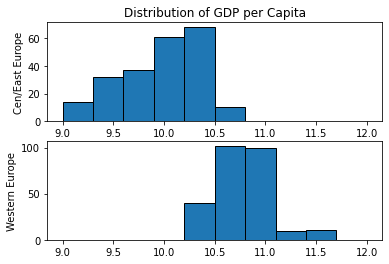

In [37]:
plt.subplot(2, 1, 1) # subplot(211)
plt.title('Distribution of GDP per Capita')
plt.hist(centralEasternEurope.LogGDPperCapita, 10, range=(9, 12), edgecolor='black')
plt.ylabel('Cen/East Europe')
plt.subplot(2, 1, 2) # subplot(212)
plt.hist(westernEurope.LogGDPperCapita, 10, range=(9, 12), edgecolor='black') 
plt.ylabel('Western Europe')
plt.show()

**Let's compare Healthy Life Expectancy At Birth for Western Europe and Sub Saharan Africa**

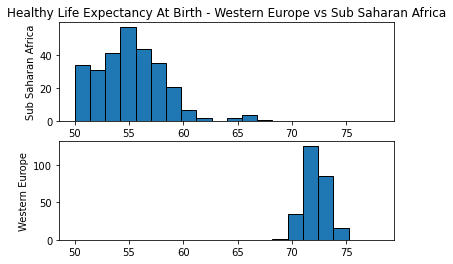

In [38]:
plt.subplot(2, 1, 1) # subplot(211)
plt.title('Healthy Life Expectancy At Birth - Western Europe vs Sub Saharan Africa')
plt.hist(subSaharanAfrica.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
plt.ylabel('Sub Saharan Africa')
plt.subplot(2, 1, 2) # subplot(212)
plt.hist(westernEurope.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black') 
plt.ylabel('Western Europe')
plt.show()

**Let us look at a few Sub-Saharan nations for comparisons<br><br>This is interesting to see. As we can see, the sub-Saharan Healthy Life Expectancy numbers are much lower than in Western Europe. Is this telling the whole story though? To get a better understanding, I think it's important to see if things are improving in this area. Let's look at the yearly trends.**

In [39]:
# Let's view the sub Saharan countries
set(subSaharanAfrica.country)

{'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Ivory Coast',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Swaziland',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia',
 'Zimbabwe'}

In [40]:
df_new = df_past.mean()

In [41]:
df_new.head()

year                            2013.259809
LifeLadder                         5.487641
LogGDPperCapita                    9.387815
SocialSupport                      0.814976
HealthyLifeExpectancyAtBirth      63.589851
dtype: float64

In [42]:
subSaharanAfrica_2010 = subSaharanAfrica[subSaharanAfrica.year == 2010]

In [43]:
subSaharanAfrica_2020 = subSaharanAfrica[subSaharanAfrica.year == 2020]

In [44]:
subSaharanAfrica_2010.mean()

year                            2010.000000
LifeLadder                         4.189672
LogGDPperCapita                    7.948720
SocialSupport                      0.794343
HealthyLifeExpectancyAtBirth      50.572222
FreedomToMakeLifeChoices           0.704966
Generosity                        -0.014326
PerceptionsOfCorruption            0.819164
PositiveAffect                     0.702591
NegativeAffect                     0.185280
dtype: float64

In [45]:
subSaharanAfrica_2020.mean()

year                            2020.000000
LifeLadder                         4.761504
LogGDPperCapita                    8.422257
SocialSupport                      0.733373
HealthyLifeExpectancyAtBirth      57.064285
FreedomToMakeLifeChoices           0.743708
Generosity                         0.075932
PerceptionsOfCorruption            0.786876
PositiveAffect                     0.700271
NegativeAffect                     0.301023
dtype: float64

**So, we can see from above, GDP and Healthy life expectancy have grown in the last 10 years. These two really seem to be correlated...**

In [48]:
subSaharanAfrica_2010.HealthyLifeExpectancyAtBirth.mean()

50.57222239176432

In [53]:
subSaharanAfrica_2010.head()

,region,country,year,LifeLadder,LogGDPperCapita,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect
1192,Sub-Saharan Africa,Cameroon,2010,4.554257,8.034702,0.758641,48.299999,0.792220,0.002303,0.874719,0.606357,0.273786
1207,Sub-Saharan Africa,Senegal,2010,4.372156,7.916806,0.760294,56.099998,0.777263,-0.077270,0.850535,0.768812,0.142738
1247,Sub-Saharan Africa,Ghana,2010,4.606252,8.224802,0.738559,54.099998,0.891130,0.073658,0.874849,0.783400,0.184129
1262,Sub-Saharan Africa,Niger,2010,4.101016,6.940521,0.654965,49.400002,0.817220,-0.023038,0.528980,0.745480,0.125838
1334,Sub-Saharan Africa,South Africa,2010,4.652429,9.429664,0.917056,50.500000,0.738906,-0.202231,0.790629,0.793740,0.123753


**Let's get 2010 and 2020 data from all the continents to compare**

In [90]:
centralEasternEurope_2010 = centralEasternEurope[centralEasternEurope.year == 2010]
centralEasternEurope_2020 = centralEasternEurope[centralEasternEurope.year == 2020]

commonwealthIndeStates_2010 = commonwealthIndeStates[commonwealthIndeStates.year == 2010]
commonwealthIndeStates_2020 = commonwealthIndeStates[commonwealthIndeStates.year == 2020]

eastAsia_2010 = eastAsia[eastAsia.year == 2010]
eastAsia_2020 = eastAsia[eastAsia.year == 2020]

latinAmericaCaribbeans_2010 = latinAmericaCaribbeans[latinAmericaCaribbeans.year == 2010]
latinAmericaCaribbeans_2020 = latinAmericaCaribbeans[latinAmericaCaribbeans.year == 2020]

middleEastNorthAfrica_2010 = middleEastNorthAfrica[middleEastNorthAfrica.year == 2010]
middleEastNorthAfrica_2020 = middleEastNorthAfrica[middleEastNorthAfrica.year == 2020]

northAmericaANZ_2010 = northAmericaANZ[northAmericaANZ.year == 2010]
northAmericaANZ_2020 = northAmericaANZ[northAmericaANZ.year == 2020]

southAsia_2010 = southAsia[southAsia.year == 2010]
southAsia_2020 = southAsia[southAsia.year == 2020]

southeastAsia_2010 = southeastAsia[southeastAsia.year == 2010]
southeastAsia_2020 = southeastAsia[southeastAsia.year == 2020]

westernEurope_2010 = westernEurope[westernEurope.year == 2010]
westernEurope_2020 = westernEurope[westernEurope.year == 2020]

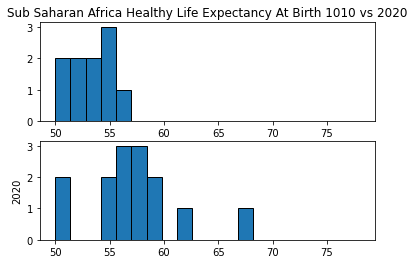

In [73]:
plt.subplot(2, 1, 1) # subplot(211)
plt.title('Sub Saharan Africa Healthy Life Expectancy At Birth 1010 vs 2020')
plt.hist(subSaharanAfrica_2010.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
plt.subplot(2, 1, 2) # subplot(212)
plt.hist(subSaharanAfrica_2020.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black') 
plt.ylabel('2020')
plt.show()


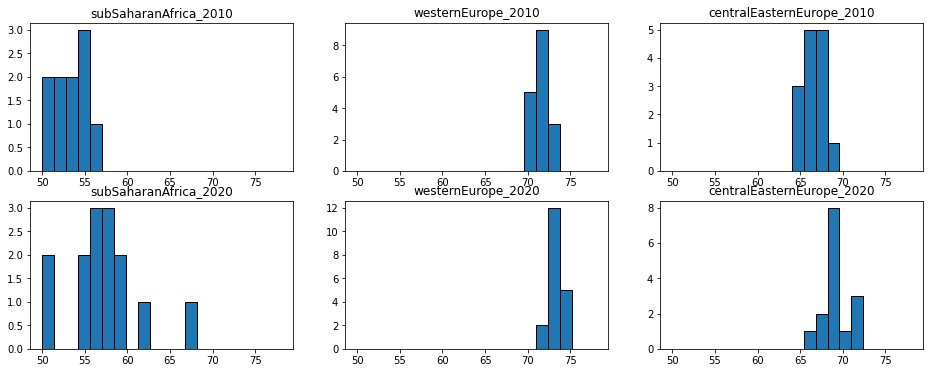

In [103]:
fig , ax = plt.subplots(nrows = 2, ncols = 3, figsize=(16,6))
 
#Plotting on the 1st axes
ax[0][0].hist(subSaharanAfrica_2010.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
ax[0][0].title.set_text('subSaharanAfrica_2010')
#Plotting on the 2nd axes
ax[1][0].hist(subSaharanAfrica_2020.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
ax[1][0].title.set_text('subSaharanAfrica_2020')

#Plotting on the 3rd axes
ax[0][1].hist(westernEurope_2010.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
ax[0][1].title.set_text('westernEurope_2010')
#Plotting on the 4th axes
ax[1][1].hist(westernEurope_2020.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
ax[1][1].title.set_text('westernEurope_2020')

#Plotting on the 5th axes
ax[0][2].hist(centralEasternEurope_2010.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
ax[0][2].title.set_text('centralEasternEurope_2010')
#Plotting on the last axes
ax[1][2].hist(centralEasternEurope_2020.HealthyLifeExpectancyAtBirth, 20, range=(50, 78), edgecolor='black')
ax[1][2].title.set_text('centralEasternEurope_2020')

plt.show()

<h1>STEP 3: Further exploration and Correlation analysis with 2020 data

In [114]:
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


We need to clean up the columns by dropping the ones not required and renaming the remaining columns

In [118]:
df_2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [119]:
df_2020.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1, inplace=True)

df_2020.head(2)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838


In [120]:
newColumns = ['country', 'region', 'lifeLadder', 'logGDPperCapita',
       'socialSupport', 'healthyLifeExpectancyAtBirth',
       'freedomToMakeLifeChoices', 'generosity',
       'perceptionsOfCorruption']

In [121]:
df_2020.columns = newColumns
df_2020.head(2)

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838


In [122]:
# Let's look at some significant values
df_2020.describe()

,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532832,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477
std,1.073923,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266
min,2.522900,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959
25%,4.851800,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607
50%,5.533500,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623
75%,6.255400,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619
max,7.842100,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343


**Now let's explore the data further**

In [123]:
cdf = df_2020[['logGDPperCapita', 'socialSupport', 'healthyLifeExpectancyAtBirth', 'perceptionsOfCorruption']]
cdf.head()

,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,perceptionsOfCorruption
0,10.775202,0.953603,72.000000,0.185846
1,10.933176,0.954410,72.699753,0.178838
2,11.117368,0.941742,74.400101,0.291698
3,10.877768,0.982938,73.000000,0.672865
4,10.931812,0.941601,72.400116,0.337938


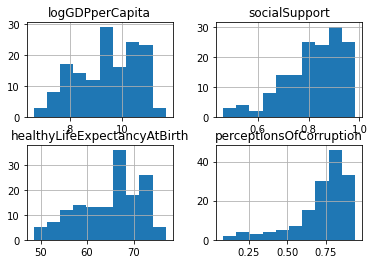

In [124]:
# Let's plot these features
viz = cdf[['logGDPperCapita', 'socialSupport', 'healthyLifeExpectancyAtBirth', 'perceptionsOfCorruption']]
viz.hist()
plt.show()

**Now let's plot each of these vs GDP to see how their linear relationship is**

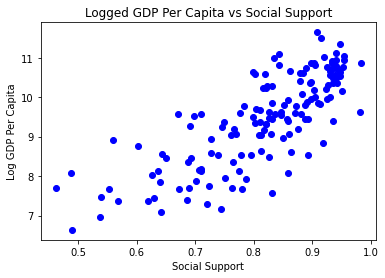

In [125]:
plt.scatter(cdf.socialSupport, cdf.logGDPperCapita, color='blue')
plt.title('Logged GDP Per Capita vs Social Support')
plt.xlabel('Social Support')
plt.ylabel('Log GDP Per Capita')
plt.show()

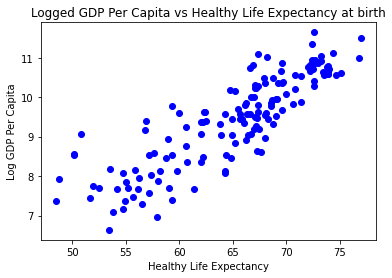

In [126]:
plt.scatter(cdf.healthyLifeExpectancyAtBirth, cdf.logGDPperCapita, color='blue')
plt.title('Logged GDP Per Capita vs Healthy Life Expectancy at birth')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Log GDP Per Capita')
plt.show()

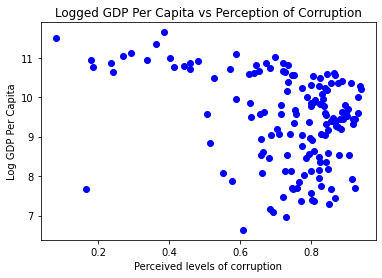

In [127]:
plt.scatter(cdf.perceptionsOfCorruption, cdf.logGDPperCapita, color='blue')
plt.title('Logged GDP Per Capita vs Perception of Corruption')
plt.xlabel('Perceived levels of corruption')
plt.ylabel('Log GDP Per Capita')
plt.show()

**It looks like the strongest correlation is between GDP Per Capita and Healthy life expectancy. Let's run a simple regression model against this correlation**

In [128]:
# We'll create a 80% - 20% Train/Test split on the dataset
msk = np.random.rand(len(df_2020)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


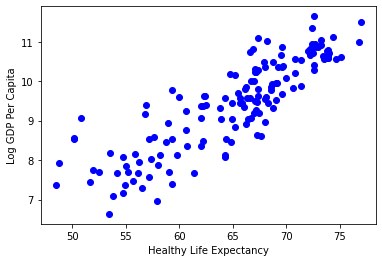

In [129]:
# Train data distribution
plt.scatter(cdf.healthyLifeExpectancyAtBirth, cdf.logGDPperCapita, color='blue')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Log GDP Per Capita')
plt.show()

In [130]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['healthyLifeExpectancyAtBirth']])
train_y = np.asanyarray(train[['logGDPperCapita']])
regr.fit (train_x, train_y)

# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[0.14448798]]
Intercept:  [0.05478631]


Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Text(0, 0.5, 'Log GDP Per Capita')

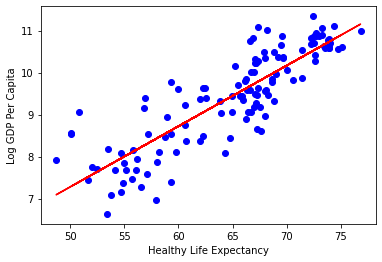

In [131]:
# Plot Outputs - We can plot the fit line over the data
plt.scatter(train.healthyLifeExpectancyAtBirth, train.logGDPperCapita, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Log GDP Per Capita')

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

    Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    Root Mean Squared Error (RMSE).
    R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).



In [132]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['healthyLifeExpectancyAtBirth']])
test_y = np.asanyarray(test[['logGDPperCapita']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.43
Residual sum of squares (MSE): 0.32
R2-score: 0.76


**So as we can see from the above, GDP vs Healthy Life expectancy is a good fit for this model. Now we will take this further and perform some unsupervised machine learning on the data for clustering**

<h1>STEP 3: Further data cleaning, arranging prior to Clustering

**The first steps are to obtain the location data using the Four Square API.**

In [2]:
CLIENT_ID = '*********************' # your Foursquare ID
CLIENT_SECRET = '*********************' # your Foursquare Secret
ACCESS_TOKEN = '*********************' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: *********************
CLIENT_SECRET:*********************


In [134]:
address = 'Albania'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.000028 19.9999619


In [135]:
df_locations = df_2020
df_locations.head(2)

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838


In [136]:
# Now we will get the geo locations of all the countries and add them to the dataframe

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
df_locations['location'] = df_locations['country'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_locations['point'] = df_locations['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_locations[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_locations['point'].tolist(), index=df_locations.index)

In [137]:
df_locations.head()

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,location,point,latitude,longitude,altitude
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,"(Suomi / Finland, (63.2467777, 25.9209164))","(63.2467777, 25.9209164, 0.0)",63.246778,25.920916,0.0
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,"(Danmark, (55.670249, 10.3333283))","(55.670249, 10.3333283, 0.0)",55.670249,10.333328,0.0
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,"(Schweiz/Suisse/Svizzera/Svizra, (46.813331250...","(46.813331250000005, 8.444947437939408, 0.0)",46.813331,8.444947,0.0
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,"(Ísland, (64.9841821, -18.1059013))","(64.9841821, -18.1059013, 0.0)",64.984182,-18.105901,0.0
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,"(Nederland, (52.5001698, 5.7480821))","(52.5001698, 5.7480821, 0.0)",52.500170,5.748082,0.0


In [138]:
df_locations.columns

Index(['country', 'region', 'lifeLadder', 'logGDPperCapita', 'socialSupport',
       'healthyLifeExpectancyAtBirth', 'freedomToMakeLifeChoices',
       'generosity', 'perceptionsOfCorruption', 'location', 'point',
       'latitude', 'longitude', 'altitude'],
      dtype='object')

In [140]:
# Now we will drop the point, location and altitude columns
df_locations.drop(['location', 'point', 'altitude'], axis=1, inplace=True)

df_locations.head()

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,63.246778,25.920916
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,55.670249,10.333328
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,46.813331,8.444947
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,64.984182,-18.105901
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,52.500170,5.748082


**Now we will create the map and plot the locations:**

In [148]:
# First let's get any null values sorted
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       149 non-null    object 
 1   region                        149 non-null    object 
 2   lifeLadder                    149 non-null    float64
 3   logGDPperCapita               149 non-null    float64
 4   socialSupport                 149 non-null    float64
 5   healthyLifeExpectancyAtBirth  149 non-null    float64
 6   freedomToMakeLifeChoices      149 non-null    float64
 7   generosity                    149 non-null    float64
 8   perceptionsOfCorruption       149 non-null    float64
 9   latitude                      148 non-null    float64
 10  longitude                     148 non-null    float64
dtypes: float64(9), object(2)
memory usage: 12.9+ KB


In [149]:
df_locations[df_locations.isna().any(axis=1)]

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
76,Hong Kong S.A.R. of China,East Asia,5.4767,11.000313,0.835781,76.820091,0.716808,0.067344,0.40265,NaN,NaN


In [151]:
print(df_locations.loc[[76]])

                      country     region  lifeLadder  logGDPperCapita  \
76  Hong Kong S.A.R. of China  East Asia      5.4767        11.000313   

    socialSupport  healthyLifeExpectancyAtBirth  freedomToMakeLifeChoices  \
76       0.835781                     76.820091                  0.716808   

    generosity  perceptionsOfCorruption  latitude  longitude  
76    0.067344                  0.40265       NaN        NaN  


In [153]:
# Let's manually get Hong Kong's coordinates
df_locations.at[76, 'latitude'] = 22.3193
df_locations.at[76, 'longitude'] = 114.1694

In [154]:
print(df_locations.loc[[76]])

                      country     region  lifeLadder  logGDPperCapita  \
76  Hong Kong S.A.R. of China  East Asia      5.4767        11.000313   

    socialSupport  healthyLifeExpectancyAtBirth  freedomToMakeLifeChoices  \
76       0.835781                     76.820091                  0.716808   

    generosity  perceptionsOfCorruption  latitude  longitude  
76    0.067344                  0.40265   22.3193   114.1694  


**Now we will create the map with the country locations for visuals**

In [155]:
# Create the map
map_world = folium.Map()

# Now we'll add the countris to the map
for lat, long, country in zip(df_locations['latitude'], df_locations['longitude'], df_locations['country']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_world)

map_world

**From a quick glance I can see that Georgia has been mapped to Georiga in the USA and not Georgia in Europe. I'll manually amend that location**

In [159]:
df_locations[df_locations['country'] == 'Georgia']

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
107,Georgia,Commonwealth of Independent States,4.8914,9.584576,0.671115,64.300011,0.782603,-0.238445,0.654996,32.329381,-83.113737


In [161]:
df_locations.at[107, 'latitude'] = 42.3154
df_locations.at[107, 'longitude'] = 43.3569

print(df_locations[df_locations['country'] == 'Georgia'])

     country                              region  lifeLadder  logGDPperCapita  \
107  Georgia  Commonwealth of Independent States      4.8914         9.584576   

     socialSupport  healthyLifeExpectancyAtBirth  freedomToMakeLifeChoices  \
107       0.671115                     64.300011                  0.782603   

     generosity  perceptionsOfCorruption  latitude  longitude  
107   -0.238445                 0.654996   42.3154    43.3569  


In [162]:
# Recreate the map
map_world = folium.Map()

# Now we'll add the countris to the map
for lat, long, country in zip(df_locations['latitude'], df_locations['longitude'], df_locations['country']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, long],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_world)

map_world

**Perfect! Now it's time to perform a final prep of the data in order to run clustering**

<h1>STEP 4: K-Means Clustering

In [163]:
df_locations.head()

,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,63.246778,25.920916
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,55.670249,10.333328
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,46.813331,8.444947
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,64.984182,-18.105901
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,52.500170,5.748082


In [164]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       149 non-null    object 
 1   region                        149 non-null    object 
 2   lifeLadder                    149 non-null    float64
 3   logGDPperCapita               149 non-null    float64
 4   socialSupport                 149 non-null    float64
 5   healthyLifeExpectancyAtBirth  149 non-null    float64
 6   freedomToMakeLifeChoices      149 non-null    float64
 7   generosity                    149 non-null    float64
 8   perceptionsOfCorruption       149 non-null    float64
 9   latitude                      149 non-null    float64
 10  longitude                     149 non-null    float64
dtypes: float64(9), object(2)
memory usage: 12.9+ KB


In [166]:
df_locations.shape

(149, 11)

To cluster, I will drop the latitude, longitude and life ladder values. I do not want to use the ladder scoring in the clustering.

In [171]:
df_toCluster = df_locations.drop(['longitude', 'latitude', 'country', 'region'], axis=1)
df_toCluster.head()

,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption
0,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938


**Now we will run the clustering - we will initially split the countries into 5 categories**

In [176]:
# Specify 5 clusters
kclusters = 5

# run k-means clustering on the dataset
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_toCluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:149]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 3, 3, 3, 2, 2, 2, 0, 3, 2, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 3, 0, 3,
       0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 2, 0, 3, 0, 3, 0, 4, 3, 1, 3, 0, 3,
       3, 0, 1, 4, 3, 0, 4, 1, 0, 1, 1, 4, 0, 1, 4, 3, 4, 0, 3, 0, 0, 0,
       4, 4, 1, 0, 1, 1, 1, 3, 4, 4, 4, 3, 3, 4, 0, 4, 3, 1, 3, 1, 4, 0,
       4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1])

**We need to merge the data to include the cluster labels**

In [177]:
# add clustering labels
df_locations.insert(0, 'Cluster Labels', kmeans.labels_)

df_locations.head()

,Cluster Labels,country,region,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
0,2,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,63.246778,25.920916
1,2,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,55.670249,10.333328
2,2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,46.813331,8.444947
3,2,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,64.984182,-18.105901
4,2,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,52.500170,5.748082


**Now we'll create the map of the world, visualizing the country into clusters**

In [179]:
# create map
map_world = folium.Map()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_locations['latitude'], df_locations['longitude'], df_locations['country'], df_locations['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_world)
       
map_world

<h1>STEP 5: RESULTS / Cluster Examination

This model has created 5 clusters. I will therefore call these clusters stars - 5 Stars being the countries with the best/highest ratings and 1 star being the lowest. This is not a personal view or opinion I hold. It is purely to categorise these nations based on their surveyed results.<br>
We can see from the map above that K-Means has ordered the countries into clusters based on their column ratings. From the visuals would seem that:<br>
BLUE (cluster-2): Appears to be 5 stars and consists mostly of Western Europe.<br>
TURQUOISE (cluster-3): Would seem to be 4 stars and spread around the globe<br>
RED (cluster-0: 3 Stars and again spread out around the globe with Africa solely being in Northern Africa<br>
ORANGE (cluster-4): Appears to be 2 stars<br>
PURPLE (cluster-1): 1 Star and only in Afghanistan outside of Africa




In [187]:
df_locations.loc[df_locations['Cluster Labels'] == 0, df_locations.columns[[1] + list(range(3, df_locations.shape[1]))]]

,country,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
29,Guatemala,6.4345,9.053408,0.813291,64.958138,0.905815,-0.037601,0.775324,15.635609,-89.898809
32,Kosovo,6.3720,9.318236,0.820958,63.812744,0.868972,0.257417,0.917488,42.586958,20.902123
41,Uzbekistan,6.1788,8.836421,0.918469,65.255310,0.970131,0.310706,0.515089,41.323730,63.952810
44,Kazakhstan,6.1518,10.154766,0.952109,65.199860,0.852517,-0.069446,0.733080,47.228609,65.209320
60,Philippines,5.8802,9.075588,0.829926,61.999954,0.916999,-0.096836,0.741764,12.750349,122.731210
64,Moldova,5.7664,9.453942,0.856775,65.698593,0.822087,-0.078677,0.918214,47.287961,28.567094
66,Kyrgyzstan,5.7436,8.538470,0.893383,64.400612,0.934532,0.119304,0.907743,41.508932,74.724091
68,Bolivia,5.7159,9.045671,0.809597,63.901218,0.874642,-0.077319,0.839006,-17.056870,-64.991229
69,Mongolia,5.6772,9.400178,0.935173,62.500114,0.707625,0.115514,0.856477,46.825039,103.849974
70,Paraguay,5.6526,9.448144,0.893345,65.900002,0.876438,0.028113,0.881680,-23.316593,-58.169345


In [188]:
df_locations.loc[df_locations['Cluster Labels'] == 1, df_locations.columns[[1] + list(range(3, df_locations.shape[1]))]]

,country,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
84,Ivory Coast,5.3060,8.551093,0.644098,50.113598,0.741463,-0.016492,0.794468,7.989737,-5.567946
90,Cameroon,5.1418,8.189097,0.709608,53.515312,0.731207,0.025644,0.847627,4.612552,13.153581
95,Niger,5.0741,7.097615,0.641138,53.780006,0.806124,0.018450,0.692541,17.735621,9.323843
97,Gambia,5.0510,7.685918,0.689622,55.160160,0.697048,0.424155,0.745968,13.442943,-16.118732
98,Benin,5.0452,8.086959,0.488511,54.712749,0.757485,-0.033809,0.660715,9.223111,2.310067
101,Guinea,4.9843,7.837750,0.639484,55.008198,0.697214,0.094679,0.766054,10.722623,-10.708359
112,Burkina Faso,4.8338,7.678090,0.672259,54.150818,0.694560,-0.008617,0.747923,12.075308,-1.688031
114,Mozambique,4.7945,7.158463,0.743818,54.705841,0.881810,0.060796,0.684409,-19.302233,34.914498
115,Nigeria,4.7593,8.532771,0.740080,50.101826,0.737416,0.037397,0.878421,9.600036,7.999972
116,Mali,4.7235,7.743618,0.724456,51.968903,0.697262,-0.036025,0.826921,16.370036,-2.290024


In [189]:
df_locations.loc[df_locations['Cluster Labels'] == 2, df_locations.columns[[1] + list(range(3, df_locations.shape[1]))]]

,country,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
0,Finland,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,63.246778,25.920916
1,Denmark,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,55.670249,10.333328
2,Switzerland,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,46.813331,8.444947
3,Iceland,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,64.984182,-18.105901
4,Netherlands,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,52.500170,5.748082
5,Norway,7.3925,11.053126,0.954445,73.300011,0.959588,0.093426,0.270028,60.500021,9.099972
6,Sweden,7.3627,10.866995,0.933805,72.700050,0.944604,0.086223,0.237460,59.674971,14.520858
7,Luxembourg,7.3244,11.646564,0.907790,72.599998,0.907180,-0.033566,0.386419,49.815868,6.129675
8,New Zealand,7.2766,10.642713,0.948148,73.400146,0.928580,0.134256,0.241641,-41.500083,172.834408
9,Austria,7.2678,10.906316,0.934176,73.299721,0.907691,0.041568,0.481378,47.200000,13.200000


In [190]:
df_locations.loc[df_locations['Cluster Labels'] == 3, df_locations.columns[[1] + list(range(3, df_locations.shape[1]))]]

,country,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
18,United States,6.9515,11.023136,0.919849,68.199860,0.836963,0.098437,0.698064,39.783730,-100.445882
21,Bahrain,6.6469,10.668611,0.861642,69.495102,0.924988,0.089117,0.721985,26.155125,50.534461
23,Taiwan Province of China,6.5844,10.870996,0.898279,69.599998,0.784361,-0.070494,0.721331,24.395052,118.160447
24,United Arab Emirates,6.5605,11.084889,0.844389,67.332893,0.932396,0.073999,0.589146,24.000249,53.999483
25,Saudi Arabia,6.4940,10.742503,0.890549,66.603096,0.877263,-0.149436,0.684005,25.624262,42.352833
30,Uruguay,6.4314,9.965593,0.924975,69.100060,0.895751,-0.092220,0.589571,-32.875555,-56.020153
33,Slovakia,6.3309,10.368945,0.935872,69.200653,0.766380,-0.123775,0.911248,48.741152,19.452865
34,Brazil,6.3301,9.577305,0.881597,66.600876,0.804414,-0.071048,0.756397,-10.333333,-53.200000
35,Mexico,6.3168,9.858916,0.830884,68.597260,0.862495,-0.146809,0.799084,22.500048,-100.000038
36,Jamaica,6.3092,9.186201,0.876502,67.500000,0.889583,-0.136797,0.884409,18.185051,-77.394769


In [191]:
df_locations.loc[df_locations['Cluster Labels'] == 4, df_locations.columns[[1] + list(range(3, df_locations.shape[1]))]]

,country,lifeLadder,logGDPperCapita,socialSupport,healthyLifeExpectancyAtBirth,freedomToMakeLifeChoices,generosity,perceptionsOfCorruption,latitude,longitude
82,Congo (Brazzaville),5.3417,8.117217,0.636479,58.220947,0.694734,-0.067540,0.744673,-0.717917,16.018049
91,Senegal,5.1318,8.118176,0.710232,59.801552,0.695216,-0.046003,0.800758,14.465177,-14.765341
94,Ghana,5.0884,8.580243,0.726757,57.586346,0.806505,0.123355,0.848191,7.857371,-1.084098
99,Laos,5.0300,8.947352,0.727973,58.968136,0.910053,0.123145,0.658196,20.017111,103.378253
102,South Africa,4.9564,9.402575,0.859682,56.903969,0.749382,-0.066997,0.859583,-28.816624,24.991639
104,Pakistan,4.9340,8.458282,0.650571,58.709000,0.725577,0.097567,0.786977,30.330840,71.247499
110,Iraq,4.8541,9.240059,0.745697,60.583317,0.629764,-0.053082,0.875212,33.095579,44.174977
111,Gabon,4.8518,9.603017,0.776402,59.961624,0.730553,-0.199858,0.839574,-0.899969,11.689970
118,Uganda,4.6365,7.677433,0.781108,56.101391,0.708827,0.121673,0.854903,1.533355,32.216658
119,Liberia,4.6252,7.287706,0.720109,56.497578,0.735268,0.050232,0.849899,5.749972,-9.365852


<h1>STEP 6: CONCLUSION

I have often thought that by gaining knowledge on any subject matter often leads to even more questions and I've certainly experienced that here. An example of this is the USA. I wasn't shocked to see USA excluded from the top tier cluster but the curious voice in my head was left with many questions. Is data collection greater in the states and therefore a more accurate representation? Is their healthy life expectancy lower due to:<br>
Obescity?<br>
Social issues (drugs, crime, guns etc.)<br>
Or is their health care service so advanced that more illnesses are diagnosed, recorded and reported?<br><br>
The only way to really answer these questions is to have a team of experts in multiple disciplines all working together to find this out with no agendas - harder to do than one might think these days...<br><br>
So, for now I'll leave you with the raw data and a little machine learning algo that has split these countries into groups. The next time you go to an all-inclusive 5 star resort, give yourself a minute to ponder what the country is reall like? Is it all Mojitos and dancing or are people concerned with the levels of corruption? The next time you see a news piece designed to hit that fear flight or fight response in you, ask yourself if they are looking to make you feel like that or present you with a balanced, impartial view.<br>
The one thing we can be sure is that it is human beings that spin the data to look how we want it to look.<br><br>
So, what do we think? Is the USA's health life expectancy lower than we would have thought to actual health reasons or advancements in health screening diagnosis protocols? I'm afraid I can't answer that, but I can ask the question...<br>Thanks for reading and I wish you all well, wherever you are in the world or whichever cluster this machine learning model has placed you.


In [198]:
# create map
map_world = folium.Map()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_locations['latitude'], df_locations['longitude'], df_locations['country'], df_locations['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_world)
       
map_world